(60000, 28, 28)
Epoch 1/5
1875/1875 [==============================] - 60s 31ms/step - loss: 0.1302 - accuracy: 0.9601
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0428 - accuracy: 0.9872
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0301 - accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0210 - accuracy: 0.9932
Epoch 5/5
1/1 [==============================] - 0s 165ms/step


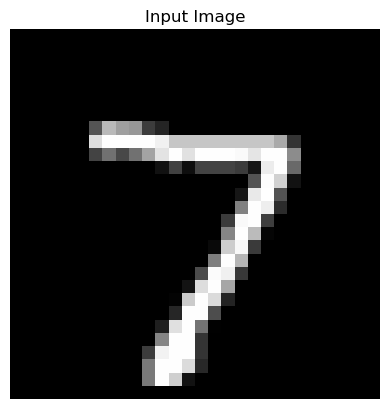

Predicted Probabilities: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Predicted Class: 7


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
x_train = x_train / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the training data
model.fit(x_train, y_train, epochs=5)

# Choose a single image from the test set
index = 0  # Replace with the index of the image you want to use
single_image = x_test[index]
input_image = np.expand_dims(single_image, axis=0)

# Get the predicted probabilities for the single image
predicted_probabilities = model.predict(input_image)

# Display the input image
plt.imshow(single_image, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()

# Display the predicted probabilities
print("Predicted Probabilities:", predicted_probabilities)

# Get the predicted class (index with highest probability)
predicted_class = np.argmax(predicted_probabilities)
print("Predicted Class:", predicted_class)
